### data load

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

In [2]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### Pre-feature Enginnering for EDA

In [8]:
print(train['datetime'][100]) # 100th datetime 
print(train['datetime'][100].split()) # Divide text by empty space -> list
print(train['datetime'][100].split()[0]) # date
print(train['datetime'][100].split()[1]) # time

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [9]:
print(train['datetime'][100].split()[0]) # date
print(train['datetime'][100].split()[0].split('-')) # Divide strings by '-'
print(train['datetime'][100].split()[0].split('-')[0]) # year
print(train['datetime'][100].split()[0].split('-')[1]) # month
print(train['datetime'][100].split()[0].split('-')[2]) # day

2011-01-05
['2011', '01', '05']
2011
01
05


In [10]:
print(train['datetime'][100].split()[1]) # time
print(train['datetime'][100].split()[1].split(':')) # Divide strings by ':'
print(train['datetime'][100].split()[1].split(':')[0]) # hour
print(train['datetime'][100].split()[1].split(':')[1]) # minute
print(train['datetime'][100].split()[1].split(':')[2]) # second

09:00:00
['09', '00', '00']
09
00
00


In [11]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # Make date feature
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # Make year feature
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1]) # Make month feature
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) # Make day feature
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0]) # Make hour feature
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1]) # Make minute feature
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2]) # Make second feature

In [12]:
from datetime import datetime
import calendar

print(train['date'][100]) # date
print(datetime.strptime(train.date[100], '%Y-%m-%d')) # Change to datetime type
print(datetime.strptime(train.date[100], '%Y-%m-%d').weekday()) # Returns weekday as an integer
print(calendar.day_name[datetime.strptime(train.date[100], '%Y-%m-%d').weekday()]) # Returns weekday as a string

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [13]:
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [14]:
train['season'] = train['season'].map({1: 'Spring', 2 : 'Summer', 3 : 'Fall', 4 :'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', \
                                         2: 'Mist, Few clouds', \
                                         3: 'Light Snow, Rain, Thunder', \
                                         4: 'Heavy Snow, Rain, Thunder'})

In [19]:
train['day'].value_counts()

01    575
09    575
17    575
05    575
16    574
15    574
14    574
13    574
19    574
08    574
07    574
04    574
02    573
12    573
03    573
06    572
10    572
11    568
18    563
Name: day, dtype: int64

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### Visualize Data

C:\Users\user\AppData\Local\Temp\ipykernel_24200\3391940788.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count']);


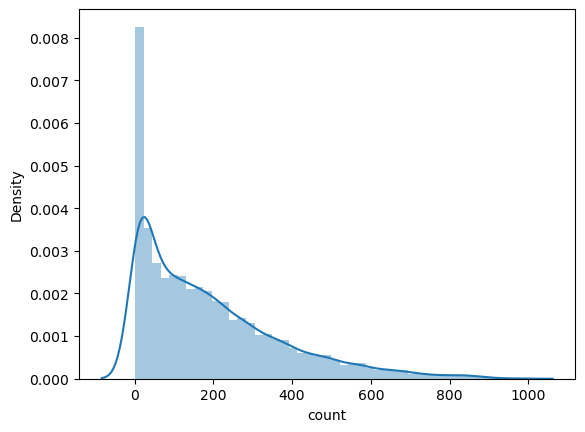

In [16]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=10) # Set font size to 10
sns.distplot(train['count']);

C:\Users\user\AppData\Local\Temp\ipykernel_24200\1089050166.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['count']));


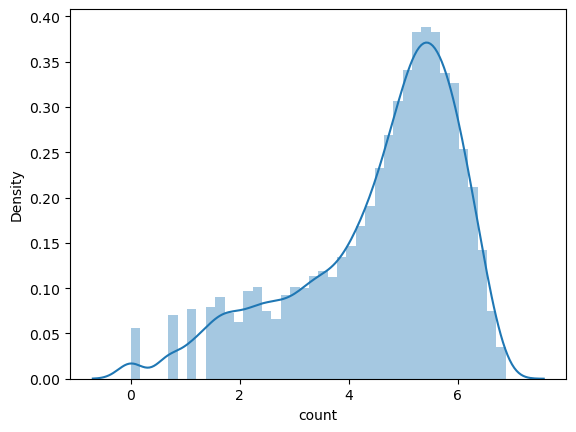

In [17]:
sns.distplot(np.log(train['count']));

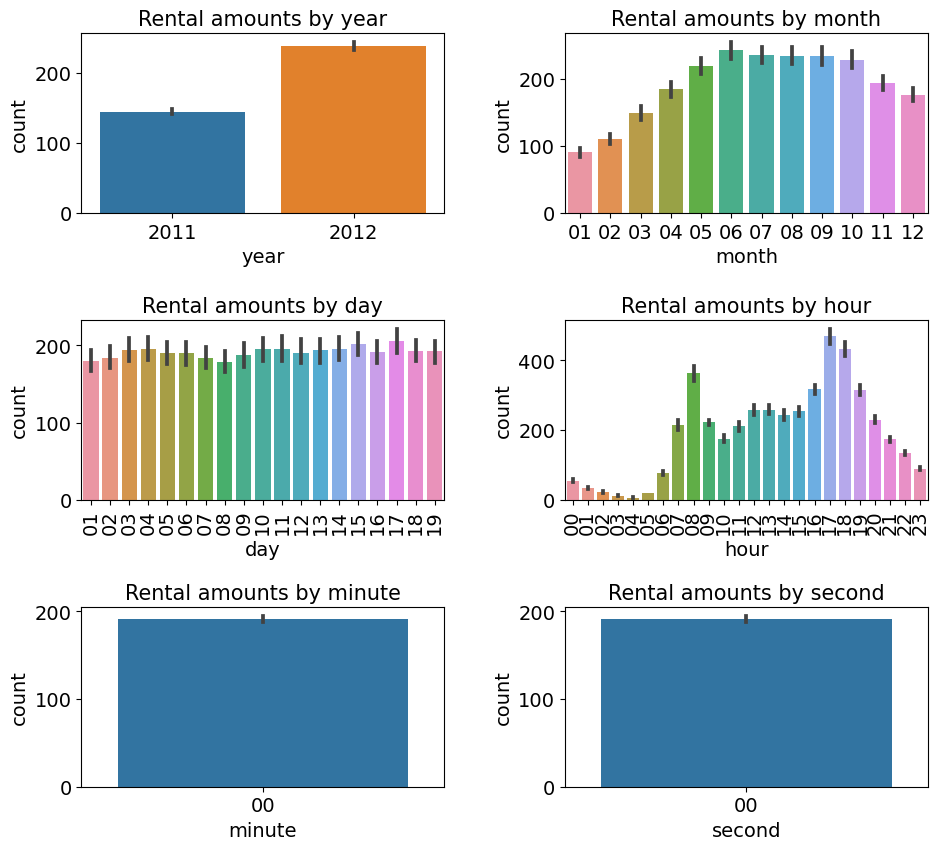

In [18]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 9) # Set total Figure size

# Step 2 : Assign subplot
# Assign each axis an average rental counts barplot per year, month, day, hour, minute, and second
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# Step 3: Detailed Settings
# 3.1 Set subplots' title
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3.2 Rotate 90 degrees of the x-axis labels of the subplots in row 1
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

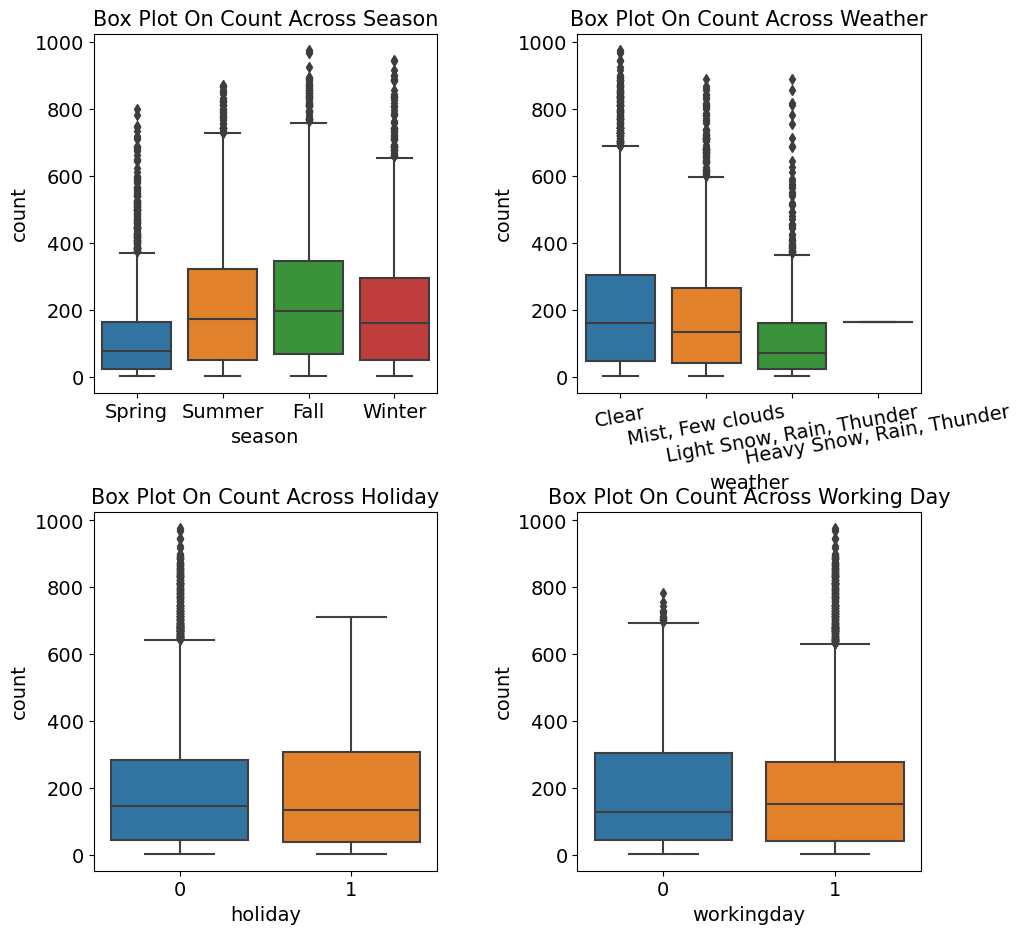

In [20]:
# Step 1 : Prepare m rows n columns Figure
figure, axes = plt.subplots(nrows=2, ncols=2) # 2rows 2columns
plt.tight_layout()
figure.set_size_inches(10, 10)

# Step 2 : Assign subplot
# Boxplot of rental counts per season, weather, holiday, and workingday
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# Step 3: Detailed Settings
# 3.1 Set subplots' title
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3.2 Fix x-axis labels overlap
axes[0, 1].tick_params('x', labelrotation=10) # rotate 10 degrees

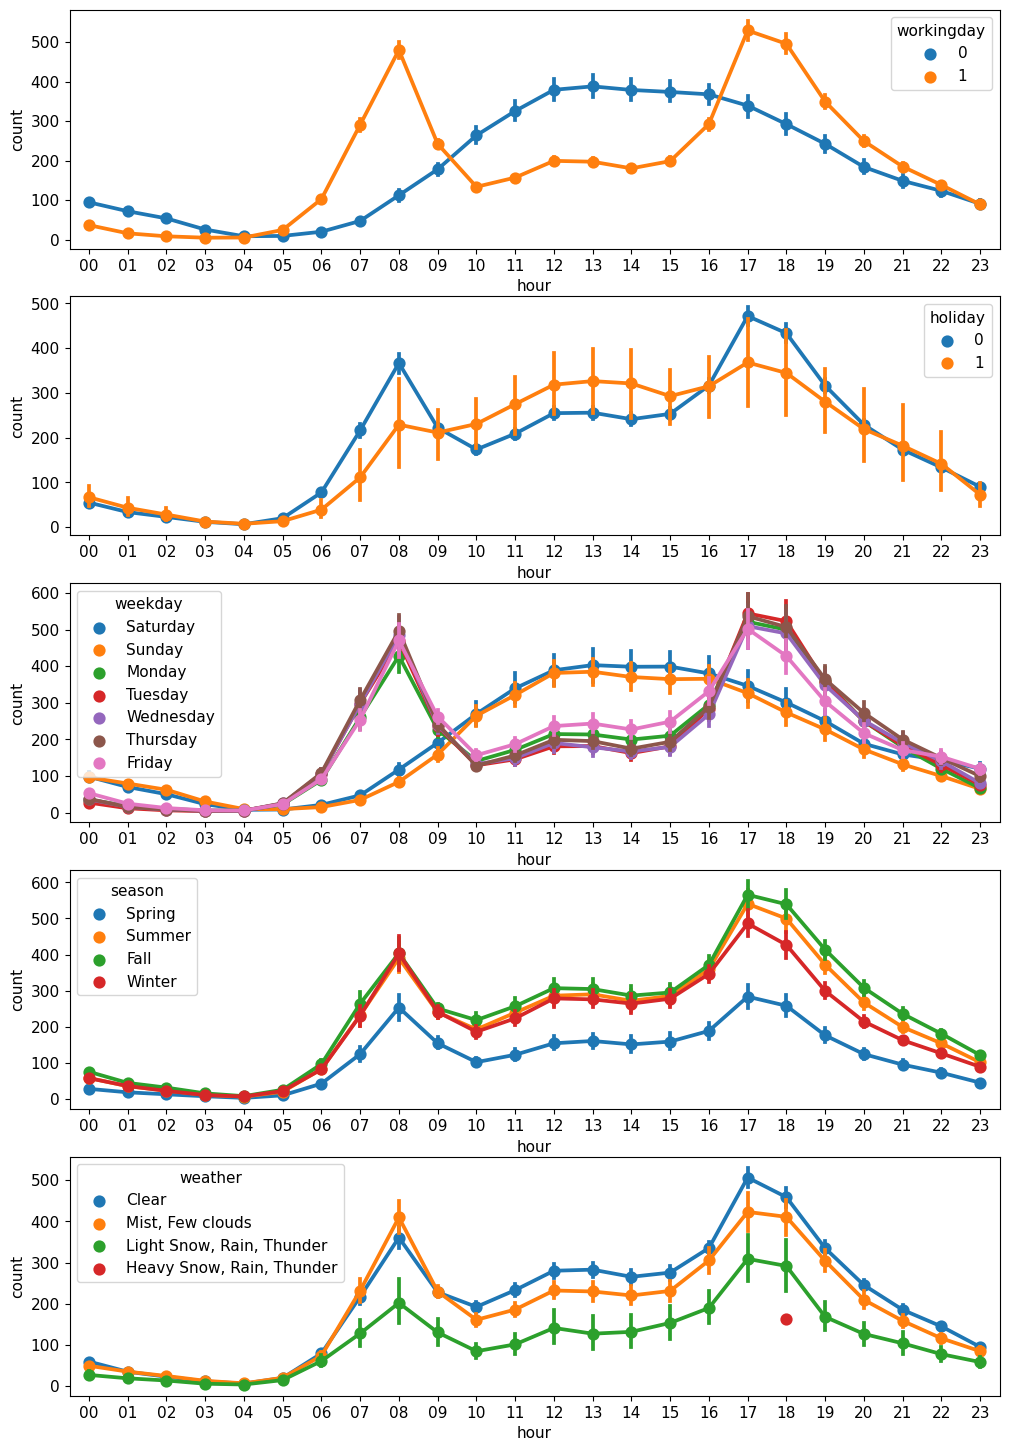

In [21]:
# Step 1 : Prepare m rows n columns Figure
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

# Step 2 : Assign subplot
# Pointplot of the average rental counts per hours by workingday, holiday, weekday, season, weather
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

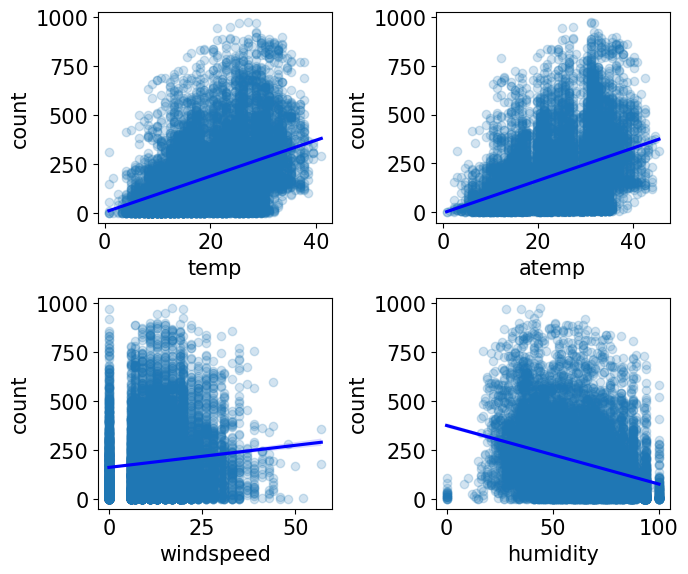

In [22]:
# Step 1 : Prepare m rows n columns Figure
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2rows 2columns
plt.tight_layout()
figure.set_size_inches(7, 6)

# Step 2 : Assign subplot
# Scatterplot of rental counts per temperature, sensible temperature, wind speed, and humidity
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

In [23]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


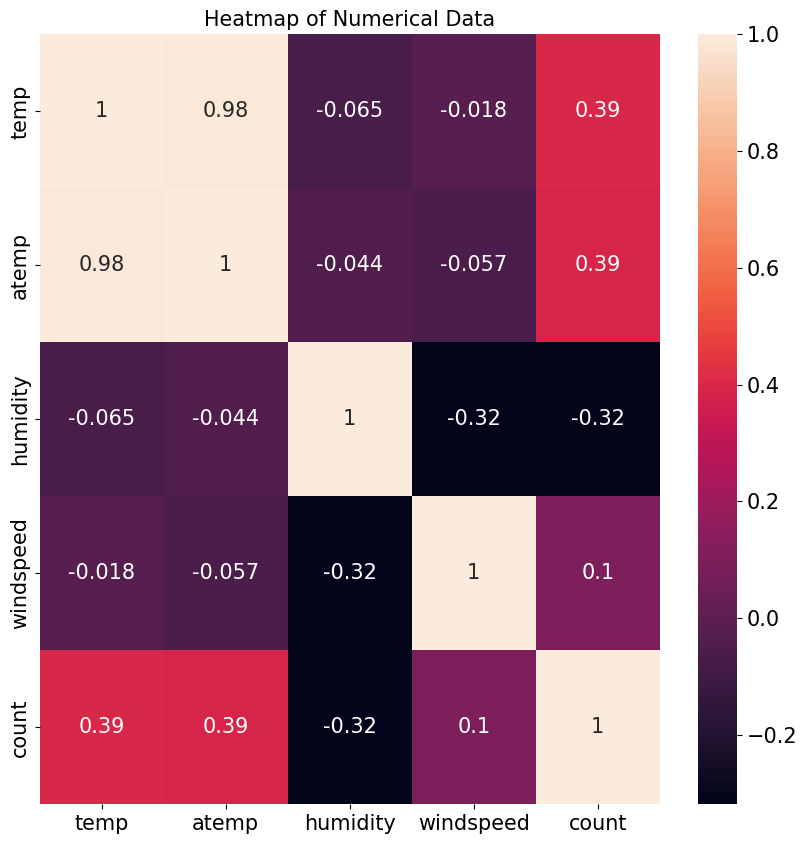

In [24]:
corrMatt = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() # Inter-feature correlation matrix
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMatt, annot=True) # Plot heatmap
ax.set(title='Heatmap of Numerical Data');